# Adding a noise feature (even dummy) would cause catastrophic degradation in model performance

## Step 1: Prepare environment


- Set up the runtime


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import sys

project_dir = os.getcwd()
while not os.path.exists(os.path.join(project_dir, ".git")):
    project_dir = os.path.dirname(project_dir)
print(f"Project directory: {project_dir}")
sys.path.insert(0, project_dir)

Project directory: /home/xj265/phd/codebase/Euphratica/Euphratica-dev


- Import customised libraries


In [3]:
import lingam
import numpy as np
import pandas as pd
from lingam.utils import make_dot
from tabeval.plugins import Plugins

## Step 2: Specify the results of interest

* GT causal graph of the data

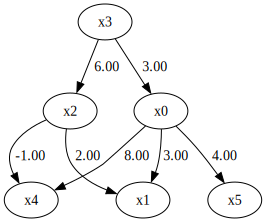

In [4]:
m = np.array(
    [
        [0.0, 0.0, 0.0, 3.0, 0.0, 0.0],
        [3.0, 0.0, 2.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 6.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [8.0, 0.0, -1.0, 0.0, 0.0, 0.0],
        [4.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    ]
)

dot = make_dot(m)

# # Save pdf
# dot.render("dag")

# # Save png
# dot.format = "png"
# dot.render("dag")

dot

* Generate the data with known causal structure

In [5]:
x3 = np.random.uniform(size=1000)
x0 = 3.0 * x3 + np.random.uniform(size=1000)
x2 = 6.0 * x3 + np.random.uniform(size=1000)
x1 = 3.0 * x0 + 2.0 * x2 + np.random.uniform(size=1000)
x5 = 4.0 * x0 + np.random.uniform(size=1000)
x4 = 8.0 * x0 - 1.0 * x2 + np.random.uniform(size=1000)
# X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T, columns=["x0", "x1", "x2", "x3", "x4", "x5"])
x6 = np.ones(1000)
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5, x6]).T, columns=["x0", "x1", "x2", "x3", "x4", "x5", "x6"])
X.head()

,x0,x1,x2,x3,x4,x5,x6
0,2.326424,14.372850,3.556934,0.567612,15.265695,9.692582,1.0
1,3.853230,25.261702,6.477434,0.981760,24.763071,15.471854,1.0
2,1.087121,7.039875,1.716736,0.187131,7.558155,5.008439,1.0
3,1.455624,9.494270,2.335811,0.362901,10.058472,6.797906,1.0
4,3.219329,21.966800,5.851249,0.879001,20.211653,13.133479,1.0


## Step 3: Export results


* Generate synthetic data with SCM

In [6]:
plugin = Plugins().get("scm", cd_method="direct-lingam", strict=False)
plugin.fit(X, task_type="regression")

In [7]:
syn_loader = plugin.generate(1000)
X = syn_loader.dataframe()
X.head()

,x0,x1,x2,x3,x4,x5,x6
0,0.548814,4.228141,2.080083,0.720310,2.583537,2.560463,0.374794
1,0.715189,4.747374,1.771649,0.907008,4.503259,3.156334,0.428686
2,0.602763,4.468443,1.834207,1.056618,3.109776,2.477927,0.683057
3,0.544883,4.317998,1.566334,1.090990,3.129601,2.530500,0.600948
4,0.423655,2.850203,1.390319,1.024951,2.039887,1.925602,0.070483


* Analyse the causal structures of synthetic data from SCM

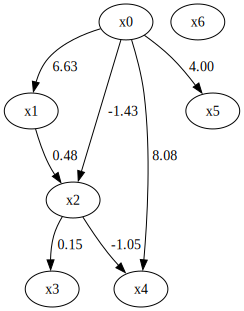

In [8]:
cd_method = lingam.DirectLiNGAM()
cd_method.fit(X)
make_dot(cd_method.adjacency_matrix_)